# STARTUP SUCCESS PREDICTION

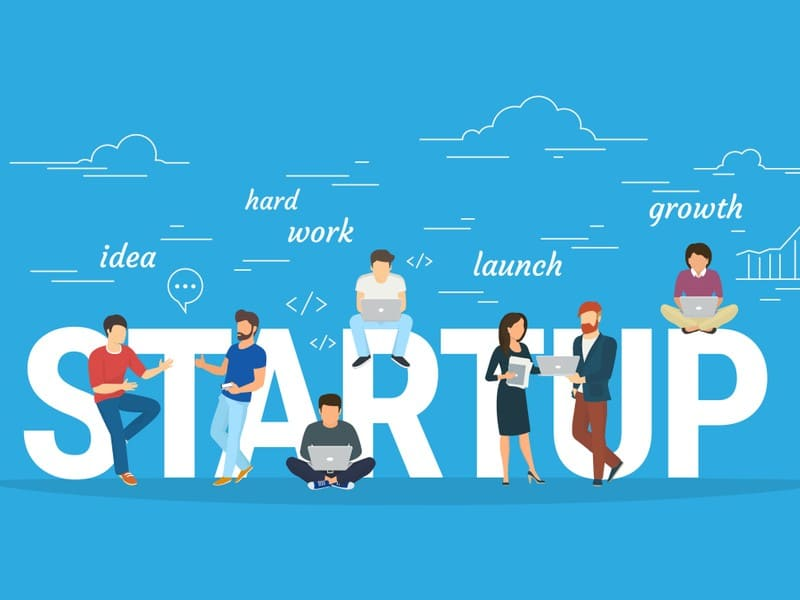

# Project Obejctive

The objective of this project is to predict the success of startups based on financial and operational features such as R&D Spend, Administration, Marketing Spend, and Location. By applying multiple machine learning models and comparing their performance, the project aims to identify key factors influencing profitability and provide insights into investment strategies for startup growth.

# Step-1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All modules Loaded Successfully')

All modules Loaded Successfully


# Step-2: Load Data/ Create DF

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farhanmd29/50-startups")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Aaryan Bhardwaj\.cache\kagglehub\datasets\farhanmd29\50-startups\versions\1


In [3]:
os.listdir(path)

['50_Startups.csv']

In [4]:
file_path = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file_path)
print('Done')

Done


# Step 3: Understand Data using EDA

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
r,c = df.shape
print(f'''Dataset Contains:
Rows: {r}
Coloumns: {c}''')

Dataset Contains:
Rows: 50
Coloumns: 5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.isna().sum().sort_values(ascending = False)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

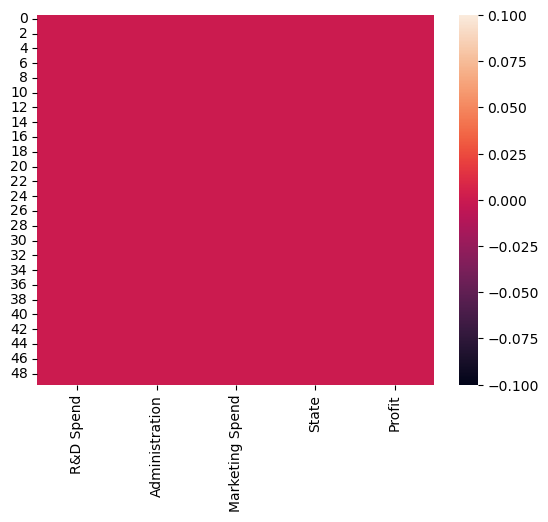

In [10]:
# Checking for null values :
sns.heatmap(df.isnull())

In [11]:
df.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


In [12]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

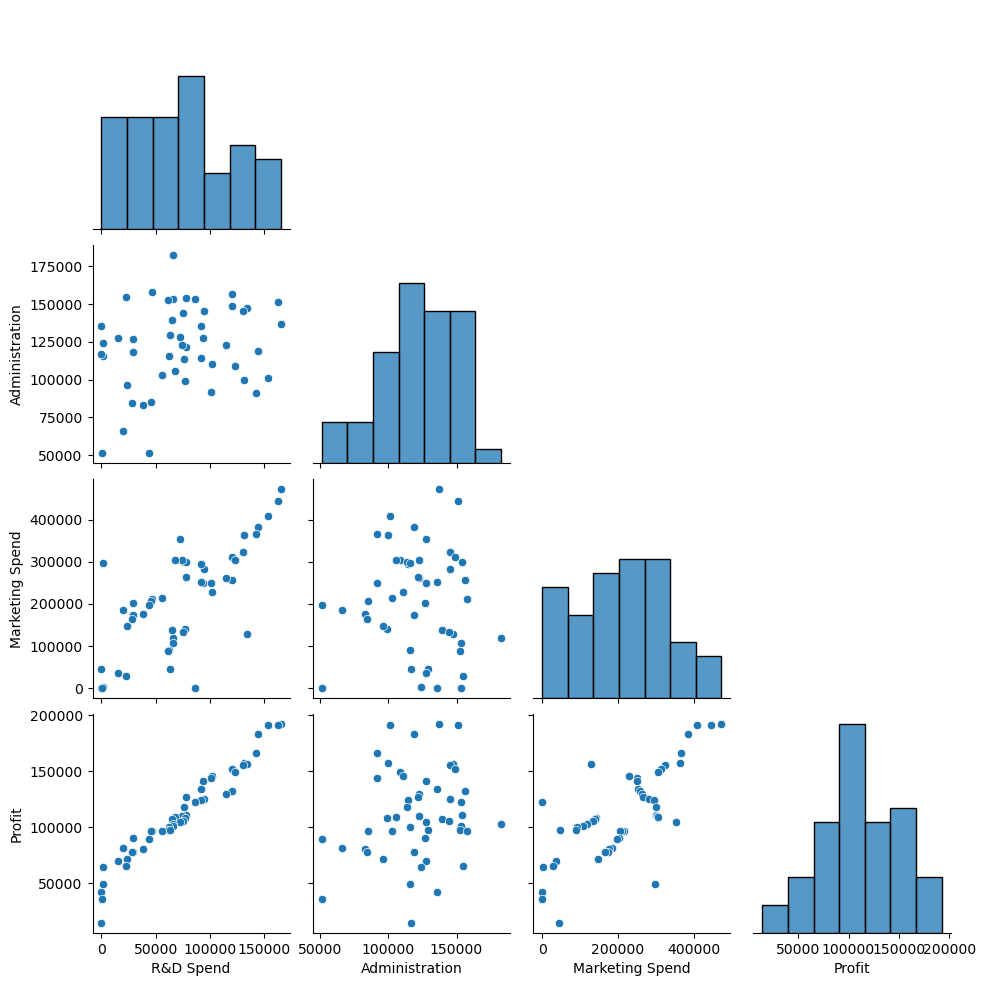

In [13]:
# Checking Data Distribution

sns.pairplot(data = df, corner = True)
plt.show()

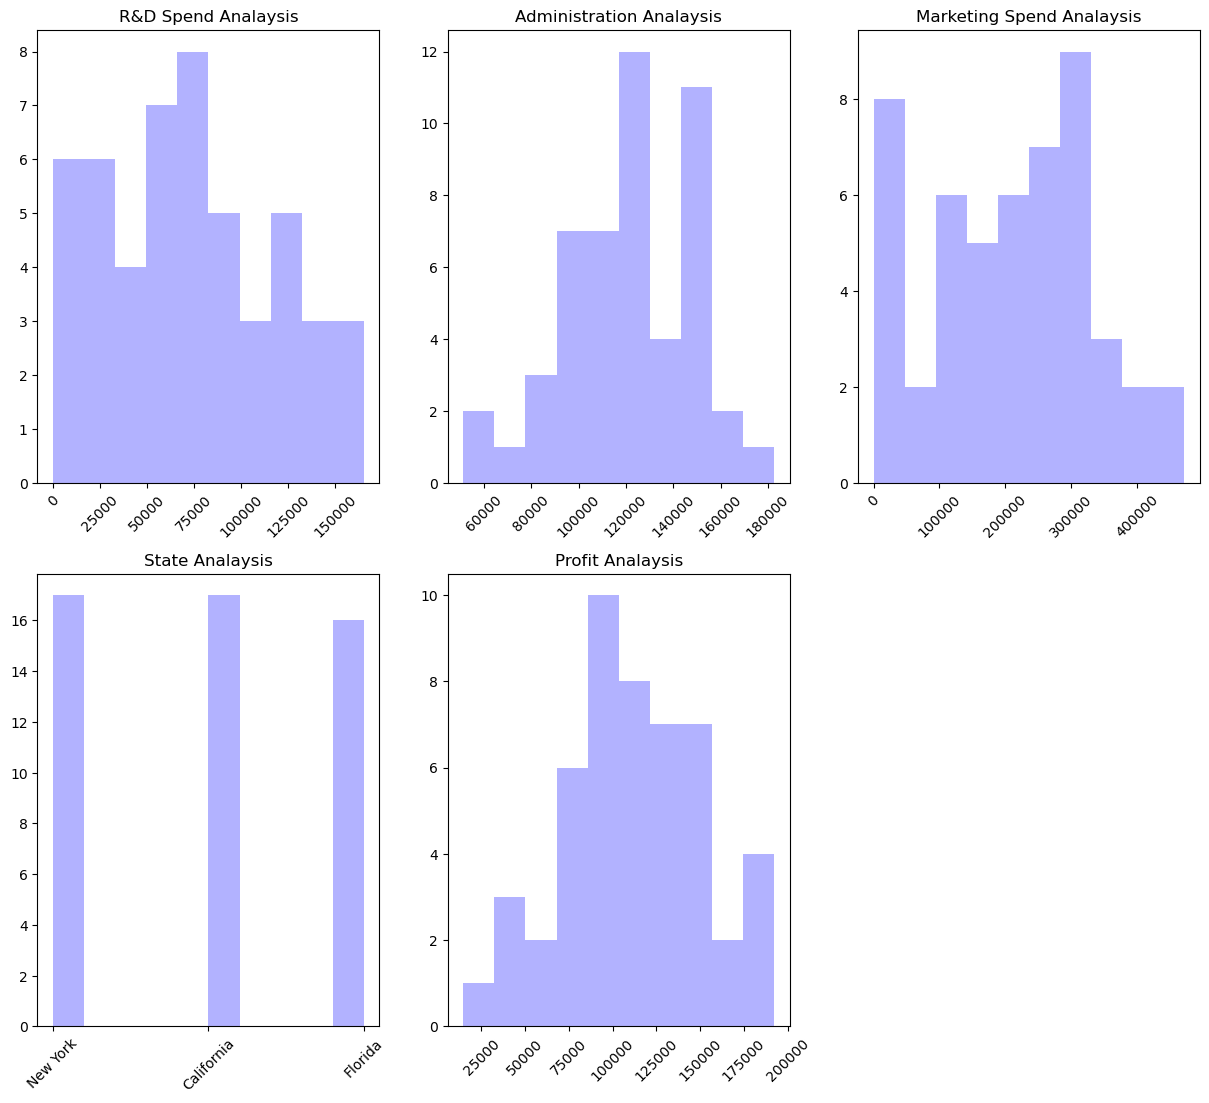

In [14]:
plt.figure(figsize = (15,20))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[j],color = 'blue', alpha = 0.3)
    plt.title(j+' Analaysis')
    plt.xticks(rotation = 45)
plt.show()

In [15]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Step-4 : Feature Engineering and Preprocessing 

In [16]:
from sklearn.preprocessing import LabelEncoder

df["State"] = LabelEncoder().fit_transform(df["State"])

In [17]:
# df

In [18]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
median_profit = df["Profit"].median()
y = (df["Profit"] > median_profit).astype(int)

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

print('Done')

Done


# Step-5: Train Test Split: Data for Training and Testing

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
print('Done')

Done


# Step- 6: Model Building

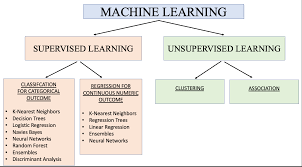

### Step- 5.1: Logisitc Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()     #Model Object

model_lr.fit(X_train,y_train)   # Training/Model Building 

LogisticRegression()

In [21]:
y_pred = model_lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [23]:
lr_score = accuracy_score(y_test,y_pred)
lr_score

0.9333333333333333

In [24]:
cm = confusion_matrix(y_test,y_pred)

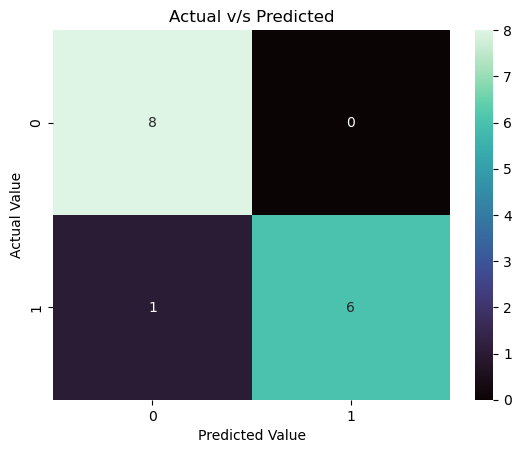

In [25]:
plt.title('Actual v/s Predicted')
sns.heatmap(cm, annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



### Step-5.2: NaiveBayes ML Model

In [27]:
from sklearn.naive_bayes import GaussianNB

model_nv = GaussianNB()

model_nv.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred = model_nv.predict(X_test)

In [29]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score: ',nv_score)

Naive Bayes Score:  0.9333333333333333


In [30]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.9333333333333333
Precision Score:  1.0
Recall Score:  0.8571428571428571
F1 Score:  0.9230769230769231


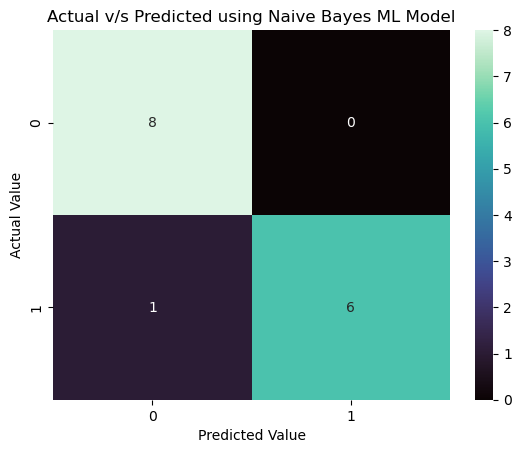

In [31]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



### Step- 5.3: Vector VL Model

In [33]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

In [34]:
y_pred = model_svc.predict(X_test)

In [35]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.9333333333333333
Precision Score:  1.0
Recall Score:  0.8571428571428571
F1 Score:  0.9230769230769231


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



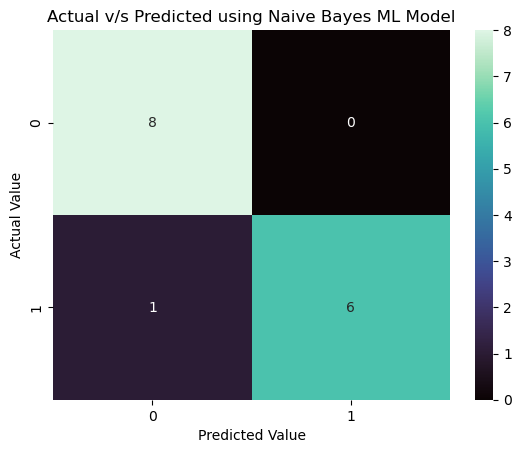

In [37]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [38]:
svm_score = accuracy_score(y_test,y_pred)

In [39]:
lr_score,nv_score,svm_score

(0.9333333333333333, 0.9333333333333333, 0.9333333333333333)

In [40]:
model_svc.score(X_test,y_test)

0.9333333333333333

### Step- 5.4: Decision Tree ML Model

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred = model_dt.predict(X_test)

In [44]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.9333333333333333
Precision Score:  0.875
Recall Score:  1.0
F1 Score:  0.9333333333333333


In [45]:
from sklearn.tree import plot_tree

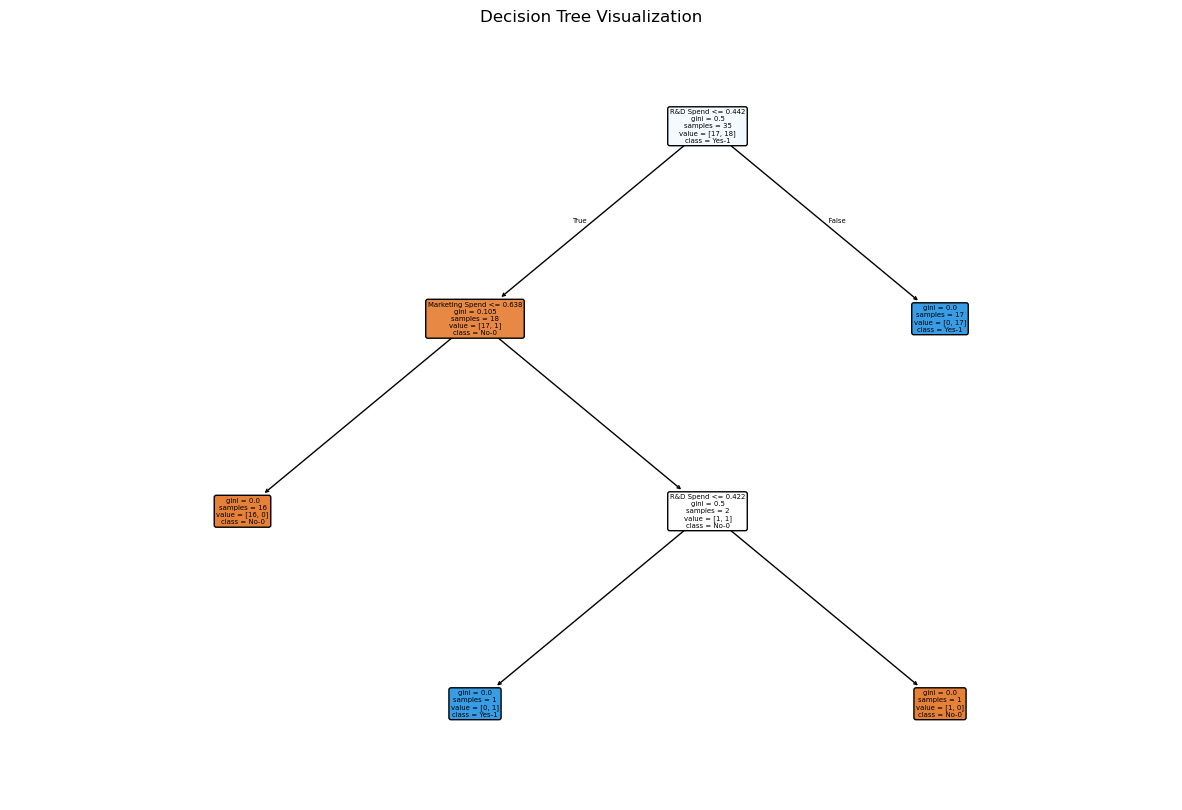

In [46]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

In [47]:
dt_score = accuracy_score(y_test,y_pred)

### Step- 5.5: KNN Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
model_knn = KNeighborsClassifier(n_neighbors = 14) # k = 14

model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [50]:
y_pred = model_knn.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



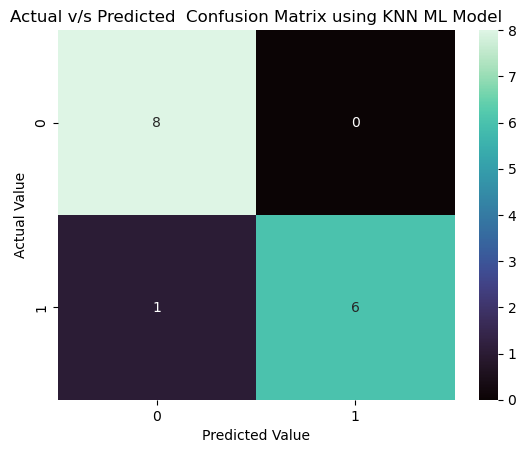

In [52]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted  Confusion Matrix using KNN ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [53]:
knn_score = accuracy_score(y_test,y_pred)

In [54]:
all_model_score = [lr_score,nv_score,svm_score,dt_score,knn_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','KNN']
# print(len(all_model_score))
print('Done')

Done


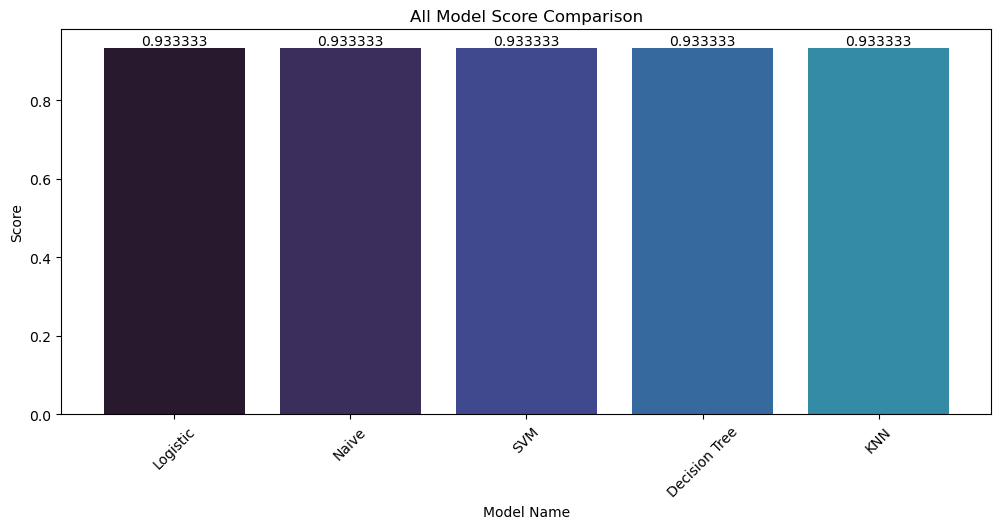

In [55]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

In [56]:
print(X.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')


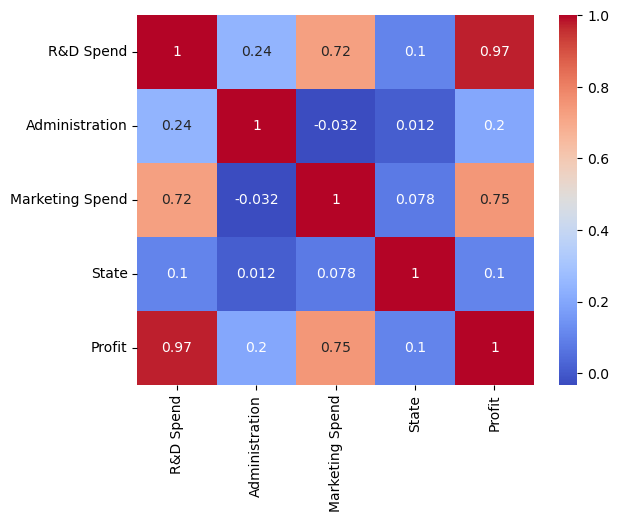

In [57]:
corr = df.corr(numeric_only=True)   # Only numeric cols
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Step-7: Best Model Save 

In [60]:
import pickle
with open('startup_success_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done


In [61]:
os.getcwd()

'C:\\Users\\Aaryan Bhardwaj\\Startup Success Predictor Project'

In [62]:
import random
random.rand

SyntaxError: invalid syntax (2942775573.py, line 1)